# Exploratory data analysis assignment

The research problem is to figure out how we can predict which individuals are most likely to have or use a bank account. Your solution will help provide an indication of the state of financial inclusion in Kenya, Rwanda, Tanzania, and Uganda, while providing insights into some of the key demographic factors that might drive individuals’ financial outcomes.

We will use the data below to answer the question:

**Dataset :** /content/Financial Dataset - 1.csv

# 1. Defining the question

# a) Specifying the question






Which individuals are most likely to have or use a bank account

# b) Defining the metric for success


# c) Understanding the context

# d) Experimental design

# e) Data Relevance

The dataset provided is data that describes the demographic factors of individuals who have bank accounts as well as those who do not have bank accounts. The data is relevant for this analysis

# 2. Reading the data

In [47]:
# Importing the libraries
import pandas as pd

import seaborn as sns

import numpy as np

import matplotlib.pyplot as plt

# Loading the dataset
# Dataset URL = /content/Financial Dataset - 1.csv

df = pd.read_csv("/content/Financial Dataset - 1.csv")
df.head()


,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


# 3. Checking our data

In [4]:
# Determing the number of records in our dataset
df.shape

(23524, 13)

In [5]:
# Previewing the top of our dataset
df.head(5)

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [6]:
# previewing the bottom of our dataset
df.tail(5)

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10.0,20.0,Male,Child,Single/Never Married,Secondary education,No Income


In [8]:
# Checking for appropriate data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 23510 non-null  object 
 1   year                    23524 non-null  int64  
 2   uniqueid                23524 non-null  object 
 3   Has a Bank account      23488 non-null  object 
 4   Type of Location        23509 non-null  object 
 5   Cell Phone Access       23513 non-null  object 
 6   household_size          23496 non-null  float64
 7   Respondent Age          23490 non-null  float64
 8   gender_of_respondent    23490 non-null  object 
 9   The relathip with head  23520 non-null  object 
 10  marital_status          23492 non-null  object 
 11  Level of Educuation     23495 non-null  object 
 12  Type of Job             23494 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.3+ MB


# 4. Cleaning our data

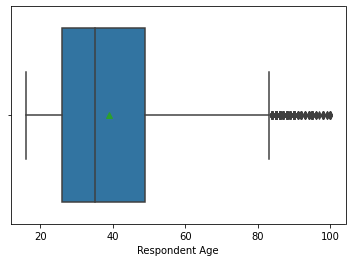

In [19]:
# Checking for outliers
# Respondent age
sns.boxplot(df["Respondent Age"], showmeans=True)
# Individuals between the ages of 25 and 50 tend to have bank accounts compared to other age groups


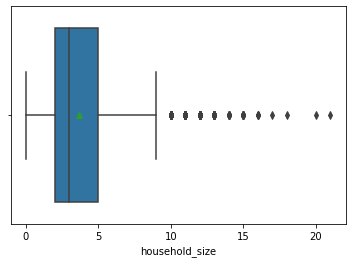

In [21]:
# Household_size
sns.boxplot(df["household_size"], showmeans=True)

In [22]:
# Checking for anomalies
print(df.nunique())

country                      4
year                         6
uniqueid                  8735
Has a Bank account           2
Type of Location             2
Cell Phone Access            2
household_size              21
Respondent Age              85
gender_of_respondent         2
The relathip with head       6
marital_status               5
Level of Educuation          7
Type of Job                 10
dtype: int64


In [24]:
# Identifying missing data
df.isnull().sum()

country                   14
year                       0
uniqueid                   0
Has a Bank account        36
Type of Location          15
Cell Phone Access         11
household_size            28
Respondent Age            34
gender_of_respondent      34
The relathip with head     4
marital_status            32
Level of Educuation       29
Type of Job               30
dtype: int64

In [28]:
# Dropping missing values in rows
df.dropna(inplace=True)
# Checking for missing values
df.isnull().values.any()


False

In [34]:
# Checking for anomalies
q1_age = df['Respondent Age'].quantile(.25)
q3_age = df['Respondent Age'].quantile(.75)
iqr_age = q3_age - q1_age

q1_size = df['household_size'].quantile(.25)
q3_size = df['household_size'].quantile(.75)
iqr_size = q3_size - q1_size

q1_year = df['year'].quantile(.25)
q3_year = df['year'].quantile(.75)
iqr_year = q3_year - q1_year

print(iqr_age,iqr_size,iqr_year)



23.0 3.0 2.0


# Univariate analysis

# a) Categorical variables

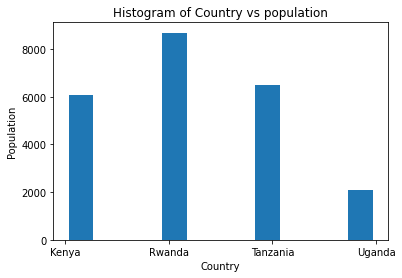

In [44]:
# Creating a histogram using values from the country column
df_country = df['country']

plt.hist(df_country, bins=10, histtype='bar', rwidth=0.8)
plt.xlabel('Country')
plt.ylabel('Population')
plt.title('Histogram of Country vs population')
plt.show()
# Rwanda has the highest number of respondents followed by Kenya

# Numerical variables

In [58]:
# Measures of central tendancies and dispersion
df.describe()

,year,household_size,Respondent Age
count,23524.000000,23496.000000,23490.000000
mean,2016.979000,3.681818,38.804300
std,0.899669,2.279933,16.519996
min,2016.000000,0.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2056.000000,21.000000,100.000000


In [61]:
# The mode of the year
df["year"].mode()

0    2016
dtype: int64

In [60]:
# The median of the household size
df["household_size"].median()

3.0

In [62]:
# Measure of dispersion
# The skewness of Respondent age
df["Respondent Age"].skew()

0.8418012375387167

In [63]:
# Quantiles of the year
df["year"].quantile([0.25,0.5,0.75])

0.25    2016.0
0.50    2017.0
0.75    2018.0
Name: year, dtype: float64

# Bivariate analysis

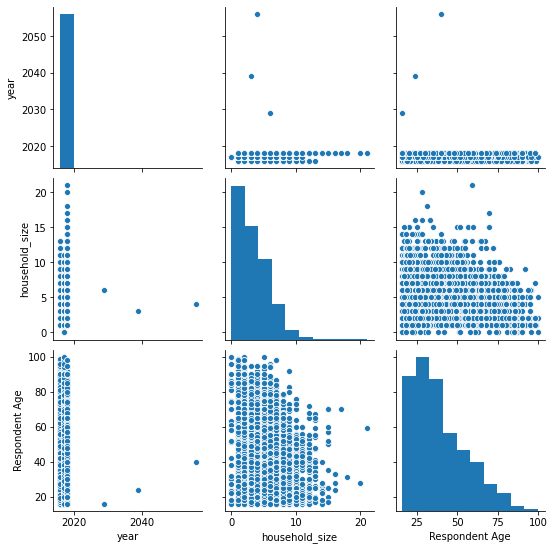

In [64]:
# Ploting the bivariate summaries
sns.pairplot(df)
plt.show()

In [65]:
# The summaries of correlation
df.corr()
# The correlations are weak and 

,year,household_size,Respondent Age
year,1.000000,-0.049344,-0.019570
household_size,-0.049344,1.000000,-0.119709
Respondent Age,-0.019570,-0.119709,1.000000


# Multivariate Analysis- Reduction techniques


# 1. Principal component analysis

In [108]:
# Step one: Loading of the data
df = pd.read_csv("/content/Financial Dataset - 1.csv")
df.head()


,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [0]:
# Step two: Converting gender column into integer
gender = {
    'Male': 1,
    'Female': 0
}
df['gender_of_respondent'] = df['gender_of_respondent'].map(gender)



In [0]:
# Converting Cell phone access column into integer
Cell = {"Yes": 1, "No": 1}
df["Cell Phone Access"] = df["Cell Phone Access"].map(Cell)

In [0]:
# Converting gender column into integer
Location = {"Rural": 1, "Urban": 1}
df["Type of Location"] = df["Type of Location"].map(Location)

In [287]:
df.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,1.0,1.0,3.0,24.0,0.0,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,1.0,1.0,5.0,70.0,0.0,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,1.0,1.0,5.0,26.0,1.0,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,1.0,1.0,5.0,34.0,0.0,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,1.0,1.0,8.0,26.0,1.0,Child,Single/Never Married,Primary education,Informally employed


In [0]:
# Dropping unecessary columns
df.drop(["country", "year", "uniqueid", "The relathip with head", "marital_status", "Level of Educuation", "Type of Job"],axis=1,inplace=True)

In [157]:
# Dropping null values
df.dropna(inplace=True)
# Checking for null values
df.isnull().values.any()


False

In [158]:
# Preview of data
df.head()

,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent
0,Yes,1.0,1.0,3.0,24.0,0.0
1,No,1.0,1.0,5.0,70.0,0.0
2,Yes,1.0,1.0,5.0,26.0,1.0
3,No,1.0,1.0,5.0,34.0,0.0
4,No,1.0,1.0,8.0,26.0,1.0


In [0]:
# Step three: Preprocessing
X = df.drop('Has a Bank account', 1)
y = df['Has a Bank account']

In [0]:
# Step four:Splitting into training and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [0]:
# Step five:Normalization
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [0]:
# Step six: Applying PCA
from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)


In [182]:
# Explained variance
explained_variance = pca.explained_variance_ratio_
explained_variance

array([3.73470672e-01, 3.33607550e-01, 2.92921778e-01, 1.00110110e-34,
       0.00000000e+00])

In [0]:
# Step seven: Using 1 Principal Component

# 
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [0]:
# Step eight: Training and Making Predictions
# In this case we'll use random forest classification for making the predictions.
# 
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [185]:
# Step nine: Performance Evaluation
# 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))

[[4015    0]
 [ 666    0]]
Accuracy 0.8577227088229011


In [0]:
# Step Ten: Results with 2 Principal Components
#
from sklearn.decomposition import PCA

pca = PCA(n_components=0.5)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [191]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

pca = PCA(n_components=3)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

# With three principal components the classification accuracy should again increase to 93.33%
classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [192]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))

[[4015    0]
 [ 666    0]]
Accuracy 0.8577227088229011


Our accuracy is 85% on the first PCA. The accuracy does not improve with increased PCA, hence we should stick to the first PCA.

# LDA

In [0]:
# Preview of data
df = pd.read_csv("/content/Financial Dataset - 1.csv")
df.head()
# Step two: Converting Cell phone access column into integer
gender = {
    'Male': 1,
    'Female': 0
}
df['gender_of_respondent'] = df['gender_of_respondent'].map(gender)



In [0]:
# Cell column into integer
Cell = {"Yes": 1, "No": 0}
df["Cell Phone Access"] = df["Cell Phone Access"].map(Cell)

In [0]:
# Location
Location = {"Rural": 1, "Urban": 0}
df["Type of Location"] = df["Type of Location"].map(Location)

In [0]:
# Dropping unecessary columns
df.drop(["country", "year", "uniqueid", "The relathip with head", "marital_status", "Level of Educuation", "Type of Job"],axis=1,inplace=True)

In [233]:
# Dropping null values
df.dropna(inplace=True)
# Checking for null values
df.isnull().values.any()

False

In [234]:
# Preview of the data
df.head()

,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent
0,Yes,1.0,1.0,3.0,24.0,0.0
1,No,1.0,0.0,5.0,70.0,0.0
2,Yes,0.0,1.0,5.0,26.0,1.0
3,No,1.0,1.0,5.0,34.0,0.0
4,No,0.0,0.0,8.0,26.0,1.0


In [0]:
X = df.drop('Has a Bank account', 1)
y = df['Has a Bank account']

In [0]:
# divide data into training and test sets
#
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [0]:
# Perform LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In [0]:
# Step 7: Training and Making Predictions


from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [240]:
# Evaluate performance
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' + str(accuracy_score(y_test, y_pred)))

[[4015    0]
 [ 666    0]]
Accuracy0.8577227088229011


PCA and LDA both show the same accuracy of 85%

In [195]:
# Installing factor analyzer 
pip install factor_analyzer==0.2.3

# Factor Analysis

In [0]:
# Preview of data
df = pd.read_csv("/content/Financial Dataset - 1.csv")
df.head()
# Step two: Converting Cell phone access column into integer
gender = {
    'Male': 1,
    'Female': 0.1
}
df['gender_of_respondent'] = df['gender_of_respondent'].map(gender)

In [0]:
# Cell column into integer
Cell = {"Yes": 1, "No": 0.1}
df["Cell Phone Access"] = df["Cell Phone Access"].map(Cell)

In [0]:
# Location
Location = {"Rural": 1, "Urban": 0.1}
df["Type of Location"] = df["Type of Location"].map(Location)

In [261]:
df.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,1.0,1.0,3.0,24.0,0.1,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,1.0,0.1,5.0,70.0,0.1,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,0.1,1.0,5.0,26.0,1.0,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,1.0,1.0,5.0,34.0,0.1,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,0.1,0.1,8.0,26.0,1.0,Child,Single/Never Married,Primary education,Informally employed


In [0]:
# Dropping unecessary columns
df.drop(["country", "year", "uniqueid", "The relathip with head", "marital_status", "Level of Educuation", "Type of Job", "Has a Bank account"],axis=1,inplace=True)

In [263]:
# Dropping null values
df.dropna(inplace=True)
# Checking for null values
df.isnull().values.any()

False

In [264]:
# Preview the data
df.head()

,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent
0,1.0,1.0,3.0,24.0,0.1
1,1.0,0.1,5.0,70.0,0.1
2,0.1,1.0,5.0,26.0,1.0
3,1.0,1.0,5.0,34.0,0.1
4,0.1,0.1,8.0,26.0,1.0


In [267]:
# Adequacy test
# - Bartlett’s Test

# Installing factor analyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

chi_square_value,p_value=calculate_bartlett_sphericity(df)
chi_square_value, p_value
# the p-value is 0. The test was statistically significant, 
# indicating that the observed correlation matrix is not an identity matrix.


(3150.742474117599, 0.0)

In [268]:
# - Kaiser-Meyer-Olkin Test
from factor_analyzer.factor_analyzer import calculate_kmo

kmo_all,kmo_model=calculate_kmo(df)
kmo_all,kmo_model
# Our values are less than 0.6 hence they are considered inadequate

(                           KMO
 Type of Location      0.483589
 Cell Phone Access     0.557996
 household_size        0.503606
 Respondent Age        0.431180
 gender_of_respondent  0.467153, 0.4935915523838378)

In [269]:
# Choosing the Number of Factors

# Creating factor analysis object and perform factor analysis
fa = FactorAnalyzer()
fa.analyze(df,5 , rotation=None)

# Checking the Eigenvalues
ev, v = fa.get_eigenvalues()
ev
# We will take the first three factors as their eigenvalues are greater than one

,Original_Eigenvalues
0,1.353574
1,1.090358
2,1.027026
3,0.852797
4,0.676245


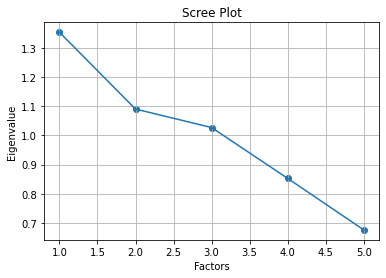

In [270]:
# Creating a scree plot using matplotlib
#
plt.scatter(range(1,df.shape[1]+1),ev)
plt.plot(range(1,df.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [271]:
# Performing Factor Analysis
# Creating factor analysis object and perform factor analysis
#
fa = FactorAnalyzer()
fa.analyze(df, 3, rotation="varimax")
fa.loadings
# Factor one has a high loading for Type of location
# Factor two has a high loading for respondent age
# Factor three has no high loading and therefore we drop it

,Factor1,Factor2,Factor3
Type of Location,0.773455,0.103677,-0.010992
Cell Phone Access,0.129342,-0.108085,0.440023
household_size,0.373185,-0.129447,0.082585
Respondent Age,-0.043280,0.780312,-0.031181
gender_of_respondent,-0.016843,0.025340,0.242533


In [272]:
# Step 13: Performing factor analysis for 2 factors
# 
# Create factor analysis object and perform factor analysis using 5 factors
fa = FactorAnalyzer()
fa.analyze(df, 2, rotation="varimax")
fa.loadings

,Factor1,Factor2
Type of Location,0.995314,-0.074751
Cell Phone Access,0.101545,0.299639
household_size,0.295153,0.287616
Respondent Age,0.015174,-0.365507
gender_of_respondent,-0.002545,0.095771


In [273]:
# Step 14: Getting variance of each factors
# 
fa.get_factor_variance()

,Factor1,Factor2
SS Loadings,1.088314,0.320861
Proportion Var,0.217663,0.064172
Cumulative Var,0.217663,0.281835


In [274]:
df.head()

,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent
0,1.0,1.0,3.0,24.0,0.1
1,1.0,0.1,5.0,70.0,0.1
2,0.1,1.0,5.0,26.0,1.0
3,1.0,1.0,5.0,34.0,0.1
4,0.1,0.1,8.0,26.0,1.0
